In [43]:
"""#!/usr/bin/env python
#title           :linear_regression_jupyter_notebook_script
#description     :This script gives a small introduction about the Linear Regression.
#author          :Gautam
#date            :07/10/2023
#last_updated    :08/10/2023
#python-version         :3.10.11
#notes           : 
#==============================================================================

# Import the modules needed to run the script."""

'#!/usr/bin/env python\n#title           :linear_regression_jupyter_notebook_script\n#description     :This script gives a small introduction about the Linear Regression.\n#author          :Gautam\n#date            :07/10/2023\n#last_updated    :08/10/2023\n#python-version         :3.10.11\n#notes           : \n#==============================================================================\n\n# Import the modules needed to run the script.'


<H1 style="color:Green"> importing Libraries </H1>


In [44]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:

pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [46]:
pip install tabulate


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<H1 style="color:Green"> Reading the file </H1>


In [48]:
#reading the dataframe
df = pd.read_csv("C:/Users/Admin/Downloads/fileInput (4).txt")

In [49]:
print(df.to_markdown())

|     |       x |          y |
|----:|--------:|-----------:|
|   0 |   24    |  21.5495   |
|   1 |   50    |  47.4645   |
|   2 |   15    |  17.2187   |
|   3 |   38    |  36.5864   |
|   4 |   87    |  87.289    |
|   5 |   36    |  32.4639   |
|   6 |   12    |  10.7809   |
|   7 |   81    |  80.7634   |
|   8 |   25    |  24.6122   |
|   9 |    5    |   6.96332  |
|  10 |   16    |  11.2376   |
|  11 |   16    |  13.5329   |
|  12 |   24    |  24.6032   |
|  13 |   39    |  39.4005   |
|  14 |   54    |  48.4375   |
|  15 |   60    |  61.699    |
|  16 |   26    |  26.9283   |
|  17 |   73    |  70.4052   |
|  18 |   29    |  29.3409   |
|  19 |   31    |  25.309    |
|  20 |   68    |  69.0293   |
|  21 |   87    |  84.9948   |
|  22 |   58    |  57.0431   |
|  23 |   54    |  50.5922   |
|  24 |   84    |  83.0277   |
|  25 |   58    |  57.0575   |
|  26 |   49    |  47.9588   |
|  27 |   20    |  24.3423   |
|  28 |   90    |  94.6849   |
|  29 |   48    |  48.0397   |
|  30 | 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [51]:
# df.isnull()
print(df.isnull())

         x      y
0    False  False
1    False  False
2    False  False
3    False  False
4    False  False
..     ...    ...
695  False  False
696  False  False
697  False  False
698  False  False
699  False  False

[700 rows x 2 columns]


In [52]:
df.isnull().sum()

x    0
y    1
dtype: int64

<h1 style="color:Green"> Data Processing </h1>


In [53]:
df = df.dropna()
print("shape of the dataframe", df.shape)

shape of the dataframe (699, 2)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


<h1 style="color:Green">Splitting Data</h1>


In [55]:
#Test input
train_input = np.array(df.x[0:500]).reshape(500,1)
train_output = np.array(df.y[0:500]).reshape(500,1)

#Test output
test_input = np.array(df.x[500:700]).reshape(199,1)
test_output = np.array(df.y[500:700]).reshape(199,1)

print(test_output)

[[  7.68202459]
 [ 61.01858089]
 [ 53.60562216]
 [ 94.47728801]
 [ 27.9645947 ]
 [ 62.55662585]
 [  1.40625441]
 [101.7003412 ]
 [ 13.84973988]
 [ 28.99769315]
 [ 99.04315693]
 [ 15.56135514]
 [ 24.63528393]
 [ 53.98393374]
 [ 42.91449728]
 [ 74.29662112]
 [ 91.17012883]
 [ 49.42440876]
 [ 82.47683519]
 [ 56.15303953]
 [ 37.17063131]
 [ 46.36928662]
 [ 97.02383456]
 [ 40.83182104]
 [ 24.08498313]
 [ 41.14386358]
 [ 21.97388066]
 [100.740897  ]
 [ 61.19971596]
 [ 74.39517002]
 [ 69.04377173]
 [ 56.68718792]
 [  5.86039171]
 [ 55.72021356]
 [ 79.22021816]
 [ 86.30177517]
 [ 25.26971886]
 [ 36.33294447]
 [ 27.65574228]
 [ 94.79690531]
 [ 58.67366671]
 [ 56.15934471]
 [ 18.40919388]
 [ 86.26936988]
 [ 26.59436195]
 [  8.45252016]
 [ 56.18131518]
 [ 27.65452669]
 [ 20.87391785]
 [ 77.83354439]
 [ 50.01787825]
 [  9.29085626]
 [ 75.0284725 ]
 [ 38.3037698 ]
 [ 44.70786405]
 [ 22.51016575]
 [102.4959452 ]
 [ 86.76845244]
 [ 13.89748578]
 [ 24.81824269]
 [ 33.94224862]
 [ 92.26970059]
 [ 68.73

In [56]:
print(f"shape of train_input {train_input.shape} ")
print(f"shape of train_output {train_output.shape} ")
print(f"shape of train_output test_input {test_input.shape} ")
print(f"shape of train_output test_output {test_output.shape} ")

shape of train_input (500, 1) 
shape of train_output (500, 1) 
shape of train_output test_input (199, 1) 
shape of train_output test_output (199, 1) 


<h1 style="color:Green">Linear_ regression Model Creation</h1>


Forward Propogation

In [57]:
 #f(x) = m *x +c 


def forward_propagation(train_input, parameters):
    print("this is m",  parameters['m'])
    m = parameters['m']
    
    
    c = parameters['c']
    print("this is c:,",c)

    predictions = np.multiply(m, train_input) + c
    return predictions

In [58]:
def cost_function(predictions, train_output):

    cost = np.mean((train_output-predictions)**2) * 0.5


    return cost



Gradient Descent for backward propagation

In [59]:
def backward_propagation(predictions, train_output, train_input):

    derivatives = dict()
    df = (predictions - train_output) 
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

    


Update Parameters 

m = m - (learning_rate * dm)




c = c - (learning_rate * dc)

In [60]:
def update_parameters(parameters, derivatives, learning_rate):
    # print(parameters)
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']

    return parameters


<h1 style="color:Green">Model Training</h1>


In [61]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) 
    parameters["c"] = np.random.uniform(0,1) 
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        print("hello1")
        
        #cost function
        cost = cost_function(predictions, train_output)
        print("hello2")
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(predictions, train_output, train_input)
        print("hello3",derivatives)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

this is m 0.5770361647848884
this is c:, 0.015840443162132845
hello1
hello2
Iteration = 1, Loss = 291.96589090341575


<Figure size 640x480 with 0 Axes>

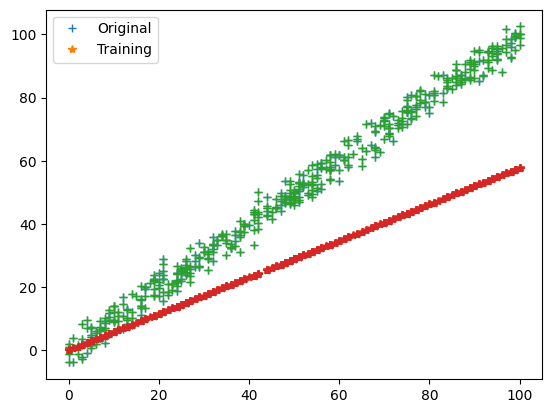

hello3 {'dm': -1371.1661674980378, 'dc': -20.69614331674853}
this is m 0.7141527815346922
this is c:, 0.017910057493807696
hello1
hello2
Iteration = 2, Loss = 134.60606205771333


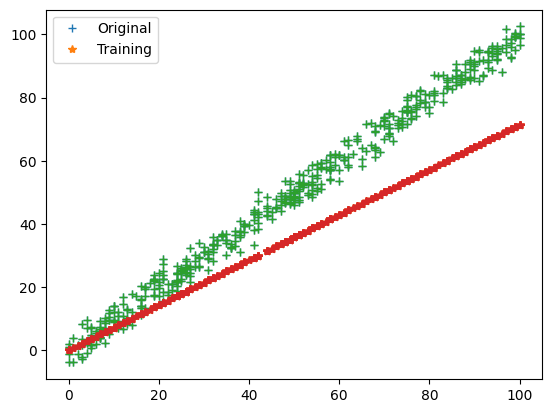

hello3 {'dm': -923.5813609918233, 'dc': -13.91914166880905}
this is m 0.8065109176338745
this is c:, 0.019301971660688602
hello1
hello2
Iteration = 3, Loss = 63.21173318105045


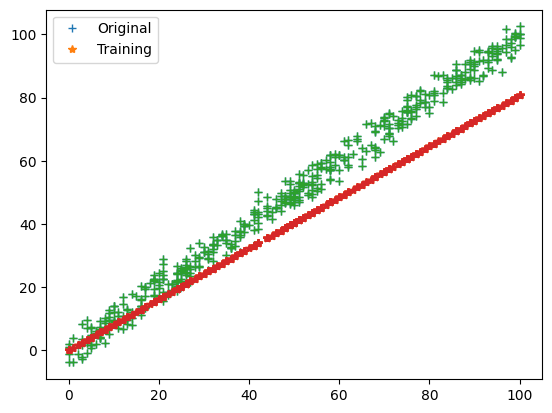

hello3 {'dm': -622.1001469067064, 'dc': -9.354334249981573}
this is m 0.8687209323245452
this is c:, 0.02023740508568676
hello1
hello2
Iteration = 4, Loss = 30.82004685928324


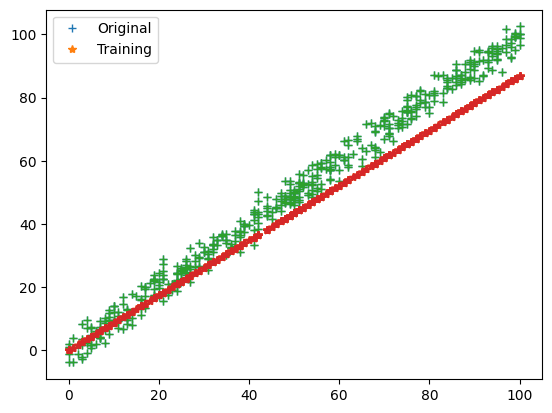

hello3 {'dm': -419.03042441790933, 'dc': -6.279601990690538}
this is m 0.910623974766336
this is c:, 0.020865365284755813
hello1
hello2
Iteration = 5, Loss = 16.123902665618154


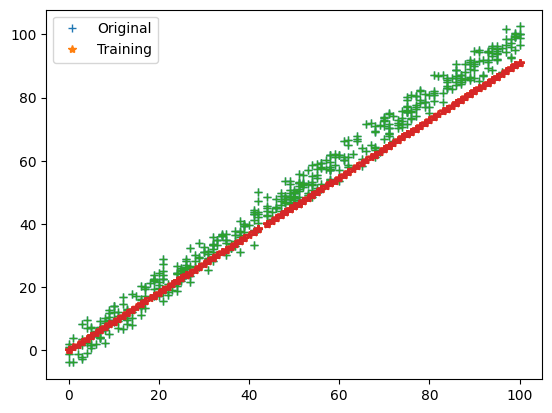

hello3 {'dm': -282.2480636409249, 'dc': -4.208544703442581}
this is m 0.9388487811304286
this is c:, 0.02128621975510007
hello1
hello2
Iteration = 6, Loss = 9.45624553579638


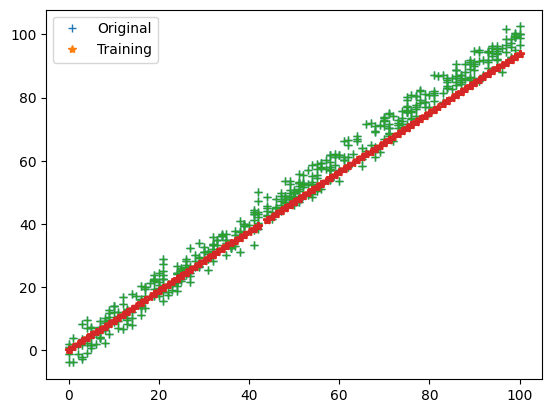

hello3 {'dm': -190.11510560581462, 'dc': -2.8135361665224257}
this is m 0.9578602916910101
this is c:, 0.021567573371752313
hello1
hello2
Iteration = 7, Loss = 6.431121879535153


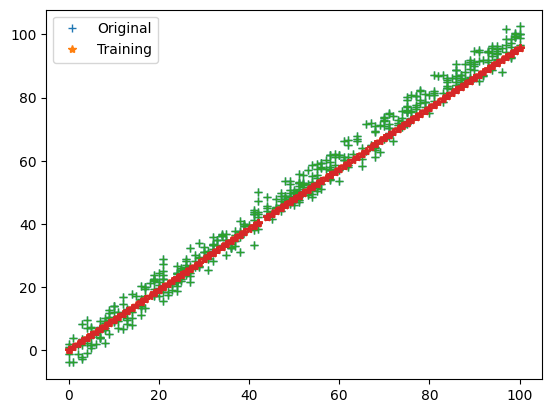

hello3 {'dm': -128.05679700196785, 'dc': -1.8738960761074395}
this is m 0.9706659713912068
this is c:, 0.021754962979363055
hello1
hello2
Iteration = 8, Loss = 5.058619694860204


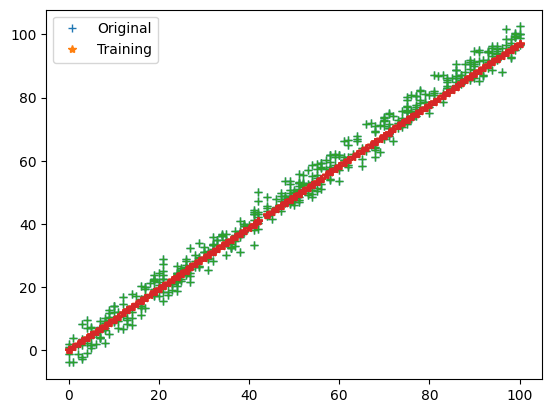

hello3 {'dm': -86.25597187762934, 'dc': -1.24098005251311}
this is m 0.9792915685789697
this is c:, 0.021879060984614365
hello1
hello2
Iteration = 9, Loss = 4.435913702367212


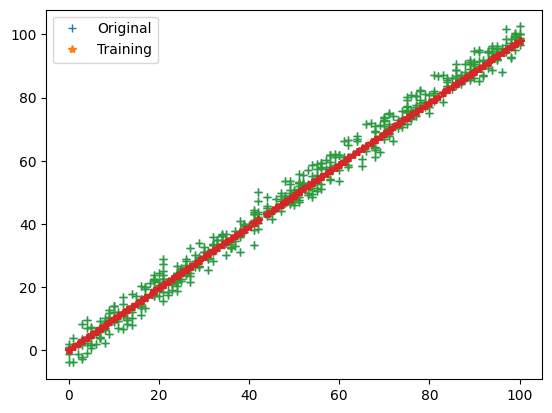

hello3 {'dm': -58.100048512176045, 'dc': -0.814665197460491}
this is m 0.9851015734301873
this is c:, 0.021960527504360415
hello1
hello2
Iteration = 10, Loss = 4.15339107278399


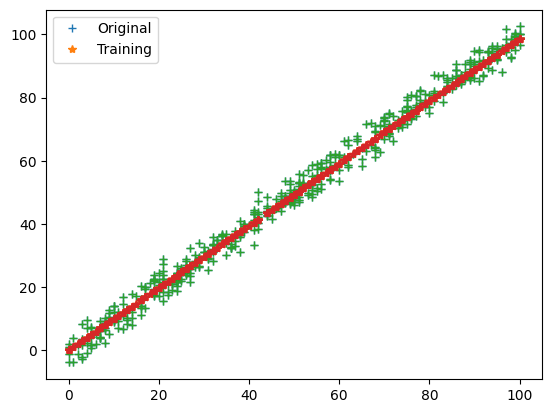

hello3 {'dm': -39.13496783939934, 'dc': -0.5275113912420816}
this is m 0.9890150702141273
this is c:, 0.022013278643484624
hello1
hello2
Iteration = 11, Loss = 4.025210011765683


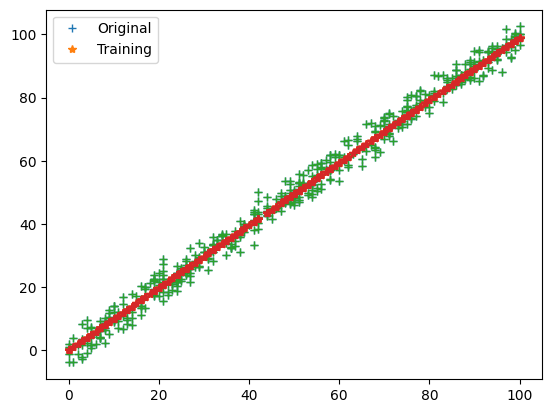

hello3 {'dm': -26.360594208285224, 'dc': -0.3340927640084869}
this is m 0.9916511296349558
this is c:, 0.022046687919885472
hello1
hello2
Iteration = 12, Loss = 3.967053891371997


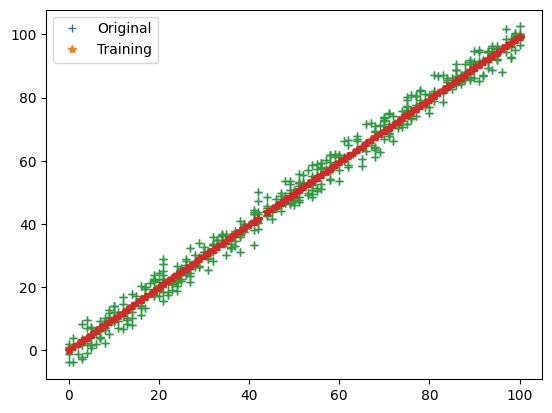

hello3 {'dm': -17.756116086994822, 'dc': -0.20381165874894908}
this is m 0.9934267412436553
this is c:, 0.022067069085760366
hello1
hello2
Iteration = 13, Loss = 3.9406681641138492


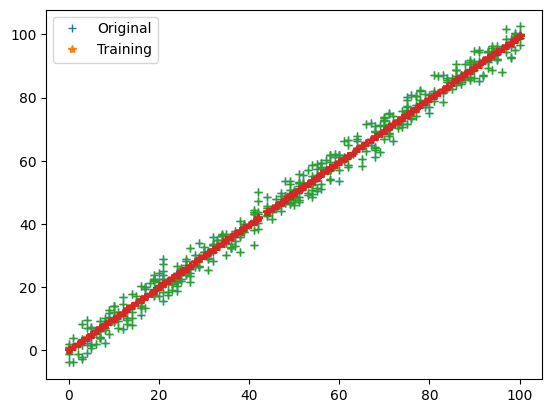

hello3 {'dm': -11.96036860758916, 'dc': -0.11605830799723235}
this is m 0.9946227781044141
this is c:, 0.022078674916560088
hello1
hello2
Iteration = 14, Loss = 3.928696699423131


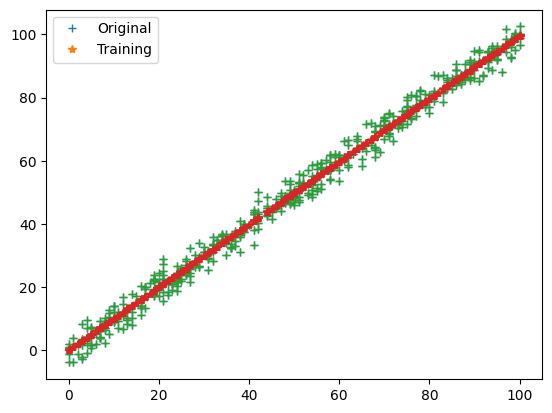

hello3 {'dm': -8.056507339739463, 'dc': -0.056950520876339256}
this is m 0.9954284288383881
this is c:, 0.02208436996864772
hello1
hello2
Iteration = 15, Loss = 3.923265001636721


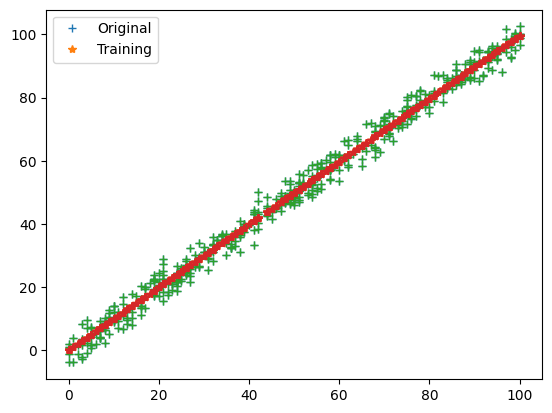

hello3 {'dm': -5.426970275178305, 'dc': -0.01713762305859447}
this is m 0.995971125865906
this is c:, 0.02208608373095358
hello1
hello2
Iteration = 16, Loss = 3.9208004033501487


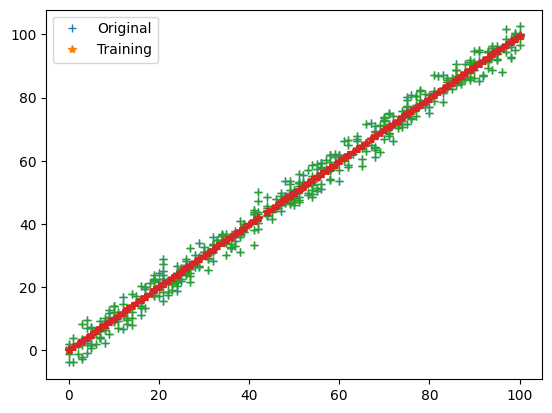

hello3 {'dm': -3.655784080331818, 'dc': 0.009678750833368426}
this is m 0.9963367042739392
this is c:, 0.02208511585587024
hello1
hello2
Iteration = 17, Loss = 3.9196819814047705


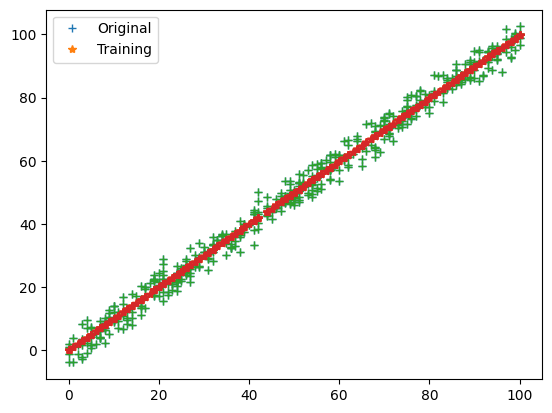

hello3 {'dm': -2.4627601880119334, 'dc': 0.02774101209920608}
this is m 0.9965829802927404
this is c:, 0.022082341754660322
hello1
hello2
Iteration = 18, Loss = 3.919174321168106


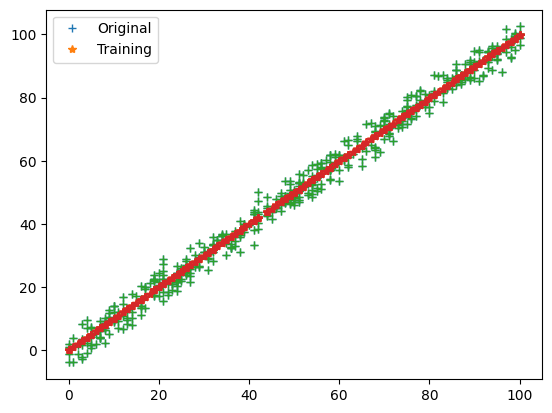

hello3 {'dm': -1.6591710360268388, 'dc': 0.03990673608696167}
this is m 0.9967488973963431
this is c:, 0.022078351081051627
hello1
hello2
Iteration = 19, Loss = 3.918943764206824


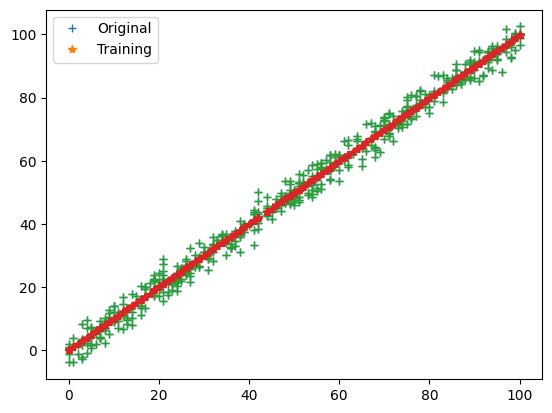

hello3 {'dm': -1.1178947610945242, 'dc': 0.04810070950236238}
this is m 0.9968606868724526
this is c:, 0.02207354101010139
hello1
hello2
Iteration = 20, Loss = 3.918838929320149


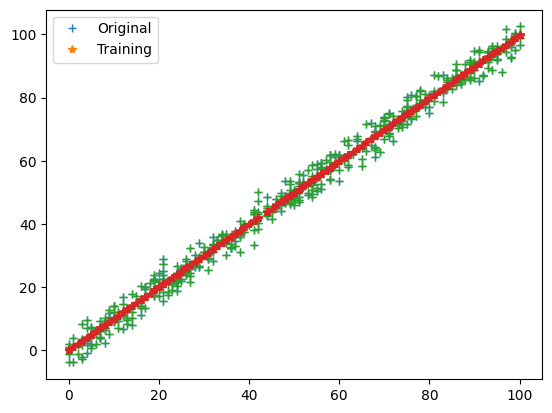

hello3 {'dm': -0.7533054592062903, 'dc': 0.053619417445981754}


In [62]:
parameters, loss= train(train_input, train_output, 0.0001, 20)

Prediction

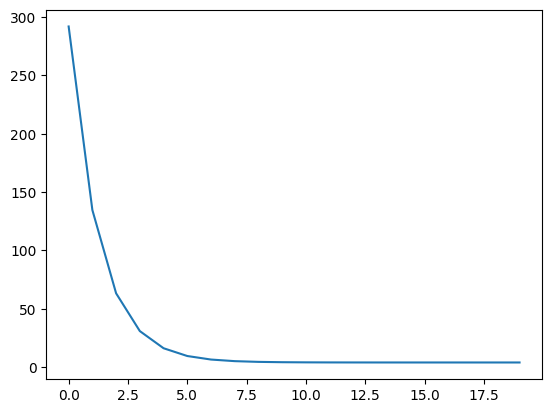

In [63]:
plt.plot(loss)

In [64]:
test_predictions = test_input * parameters['m'] + parameters['c']

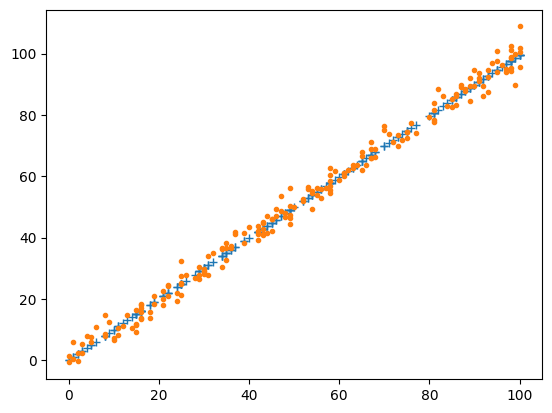

In [65]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")

In [66]:
cost = cost_function(test_predictions, test_output)

In [67]:
print(cost)

3.997783344949829


In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [69]:
lr_model = LinearRegression()

In [70]:
lr_model.fit(train_input, train_output)

LinearRegression()

In [76]:
predictions = lr_model.predict(test_input)

In [72]:
cost = cost_function(predictions, test_output)
print(cost)

4.015015795917687


<Figure size 640x480 with 0 Axes>

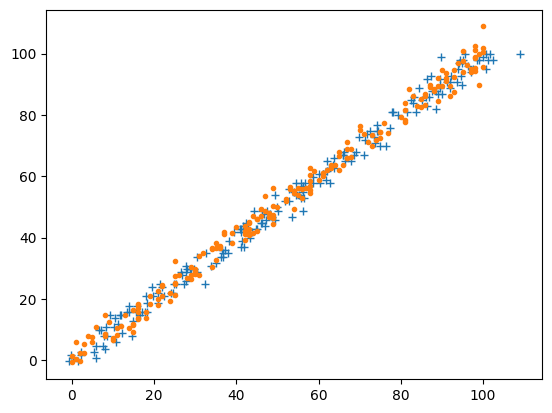

<Figure size 640x480 with 0 Axes>

In [77]:
plt.plot(test_output, predictions, "+")
plt.plot(test_input, test_output, ".")
plt.figure()

In [74]:
from sklearn.metrics import mean_squared_error

In [78]:
cost = mean_squared_error(test_output, test_predictions)
print(cost)

7.995566689899658
